In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
from tqdm import tqdm
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.utils.grid_search import GridSearch
import time
import csv
import pygame
import itertools
import gc

gc.collect();
#from A4_Utils import mode_policy_dict,visualize_policy

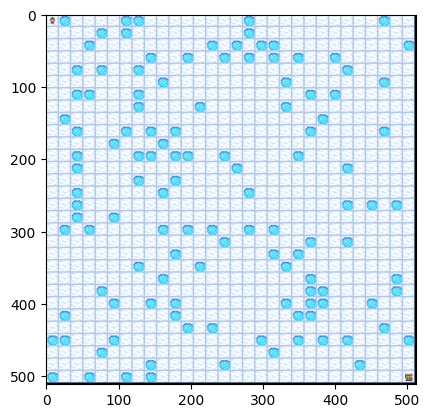

In [2]:
#Selecting a large frozen lake for an MDP
size_val=30
seed=42
frozen_lake = gym.make('FrozenLake-v1', desc=np.load('saved_data/forzen_lake_env.npy') ,is_slippery=True, render_mode="rgb_array", negative_reward_hole=True)
frozen_lake.reset(seed=seed);
plt.imshow(frozen_lake.render())

### Policy Iteration

In [599]:
#Initializing gamms
gammas=np.arange(0.57,1.0,0.03)

In [ ]:
#Testing the effect of convergence rate for the same convergence value for frozen lakes
REPEATS=5
iters=5000
convergence_policy_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
times_policy_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
v_policy_iterations=np.zeros(shape=(len(gammas),REPEATS,size_val**2))
vi_policy_all_iterations=np.zeros(shape=(len(gammas),REPEATS,iters,size_val**2))
pi_policy_iteraetions={}

for big_i,gamma in tqdm(enumerate(gammas)):
    for i in range(REPEATS):
        frozen_lake.reset()
        
        #Solving
        start=time.time()
        V, V_track, pi, convergence_i = Planner(frozen_lake.P).policy_iteration(gamma=gamma,n_iters=iters)
        end=time.time()

        #Storing Time
        times_policy_iterations[big_i,i]=end-start

        #Getting iterations
        convergence_policy_iterations[big_i,i]=convergence_i

        #Storing policy
        pi_policy_iteraetions['{:.2f}_{}'.format(gamma,i)]=pi

        #Stroing ideal V
        v_policy_iterations[big_i,i]=V

        #Storing V historic
        V_track[np.argwhere(V_track.sum(axis=-1)==0)[1][0]:]=V_track[np.argwhere(V_track.sum(axis=-1)==0)[1][0]-1]
        vi_policy_all_iterations[big_i,i]=V_track

15it [02:19,  9.29s/it]


In [ ]:
#Testing the effect of convergence rate for the same convergence value for frozen lakes
REPEATS=5
iters=5000
convergence_value_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
times_value_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
v_value_iterations=np.zeros(shape=(len(gammas),REPEATS,size_val**2))
vi_value_all_iterations=np.zeros(shape=(len(gammas),REPEATS,iters,size_val**2))
pi_value_iteraetions={}

for big_i,gamma in tqdm(enumerate(gammas)):
    for i in range(REPEATS):
        frozen_lake.reset()
        
        #Solving
        start=time.time()
        V, V_track, pi, convergence_i = Planner(frozen_lake.P).value_iteration(gamma=gamma,n_iters=iters)
        end=time.time()

        #Storing Time
        times_value_iterations[big_i,i]=end-start

        #Getting iterations
        convergence_value_iterations[big_i,i]=convergence_i

        #Storing policy
        pi_value_iteraetions['{:.2f}_{}'.format(gamma,i)]=pi

        #Stroing ideal V
        v_value_iterations[big_i,i]=V

        #Storing V historic
        V_track[np.argwhere(V_track.sum(axis=-1)==0)[1][0]:]=V_track[np.argwhere(V_track.sum(axis=-1)==0)[1][0]-1]
        vi_value_all_iterations[big_i,i]=V_track

15it [01:13,  4.88s/it]


Text(0, 0.5, 'Number of Iterations')

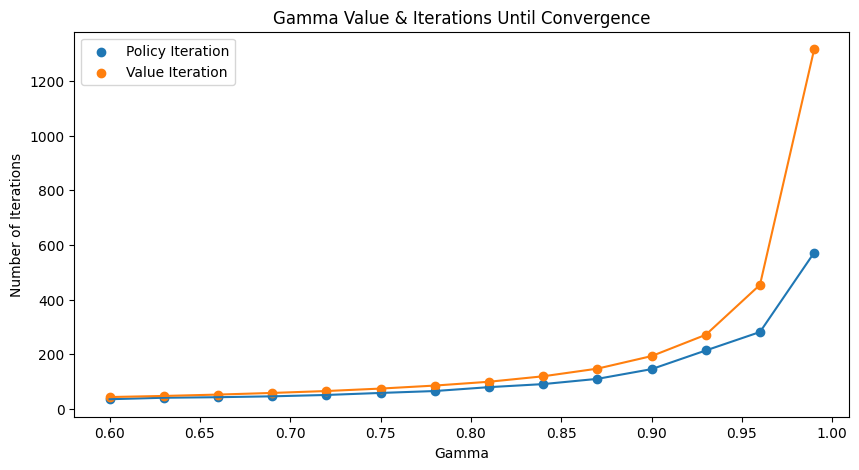

In [ ]:
#Plot number of iterations for policy iteration
fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Gamma Value & Iterations Until Convergence')
plt.scatter(gammas,convergence_policy_iterations.mean(axis=1),label='Policy Iteration')
plt.scatter(gammas,convergence_value_iterations.mean(axis=1),label='Value Iteration')
plt.plot(gammas,convergence_policy_iterations.mean(axis=1))
plt.plot(gammas,convergence_value_iterations.mean(axis=1))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Number of Iterations')

Text(0, 0.5, 'Time')

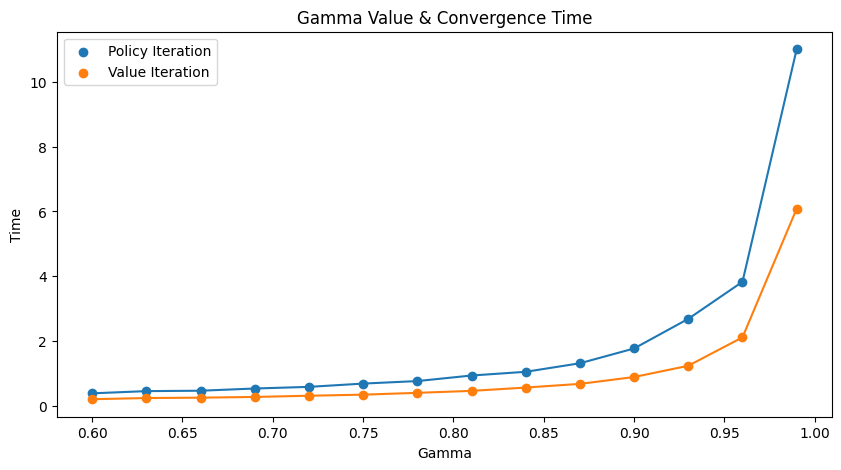

In [ ]:
#Plot number Time for Value iteration
fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Gamma Value & Convergence Time')
plt.scatter(gammas,times_policy_iterations.mean(axis=1),label='Policy Iteration')
plt.scatter(gammas,times_value_iterations.mean(axis=1),label='Value Iteration')
plt.plot(gammas,times_policy_iterations.mean(axis=1))
plt.plot(gammas,times_value_iterations.mean(axis=1))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Time')

In [ ]:
vi_policy_all_iterations.mean(axis=1).mean(axis=-1).shape

(15, 5000)

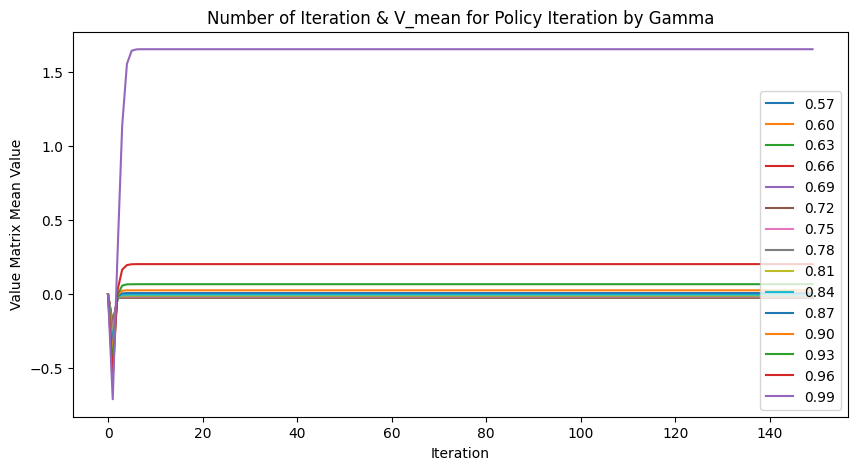

In [ ]:
#Plot ting V_mean by gamma for policy iteration
cufoff=150
fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Number of Iteration & V_mean for Policy Iteration by Gamma')

for i in range(len(gammas)):
    #plt.scatter(np.arange(cufoff),vi_policy_all_iterations.mean(axis=1).mean(axis=-1)[i,:cufoff],label='{:.2f}'.format(gammas[i]))
    plt.plot(np.arange(cufoff),vi_policy_all_iterations.mean(axis=1).mean(axis=-1)[i,:cufoff],label='{:.2f}'.format(gammas[i]))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Value Matrix Mean Value');

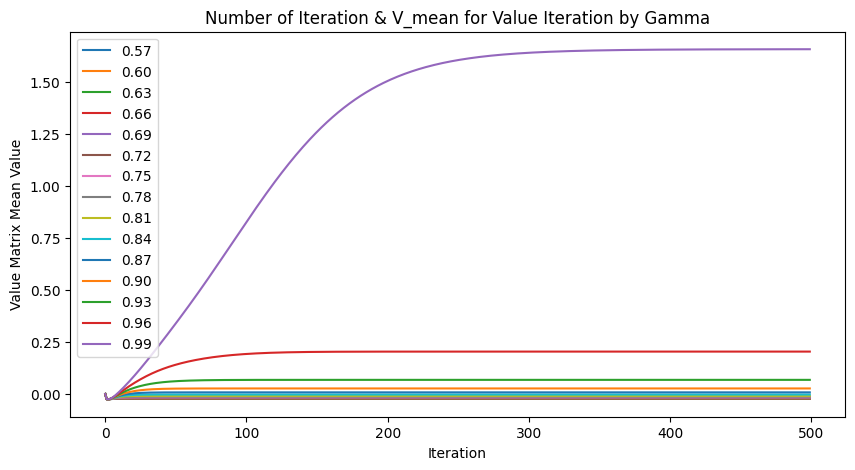

In [ ]:
#Plot ting V_mean by gamma for value iteration
cufoff=500
fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Number of Iteration & V_mean for Value Iteration by Gamma')

for i in range(len(gammas)):
    #plt.scatter(np.arange(cufoff),vi_policy_all_iterations.mean(axis=1).mean(axis=-1)[i,:cufoff],label='{:.2f}'.format(gammas[i]))
    plt.plot(np.arange(cufoff),vi_value_all_iterations.mean(axis=1).mean(axis=-1)[i,:cufoff],label='{:.2f}'.format(gammas[i]))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Value Matrix Mean Value');

In [ ]:
#Sucess Rate for each ideal policy for each gamma policy iteration
attempts=20
win_rate_policy=np.zeros(shape=(gammas.shape[0],REPEATS))
reward_rate_policy=np.zeros(shape=(gammas.shape[0],REPEATS))
num_steps_won_policy=np.zeros(shape=(gammas.shape[0],REPEATS))
parent_dict=pi_policy_iteraetions

for ig,gamma in tqdm(enumerate(gammas)):
    for ir,repeat in enumerate(range(REPEATS)):
        key='{:.2f}_{}'.format(gamma,repeat)
        chosen_dict=parent_dict[key]
        won_counter=0
        reward=0
        steps=0
        for i in range(attempts):
            #Resetting the lake
            frozen_lake.reset()
            checker=0
            ended=False
            inner_steps=0
            while not ended:
                if checker==0:
                    checker+=1
                    state,r,ended,won,_=frozen_lake.step(chosen_dict[0])
                else:
                    state,r,ended,won,_=frozen_lake.step(chosen_dict[state])
                reward+=r
                inner_steps+=1
            if float(r>1):
                steps+=inner_steps    
            won_counter+=float(r>1)
        if won_counter==0:
            num_steps_won_policy[ig,ir]=np.inf
        else:
            num_steps_won_policy[ig,ir]=steps/won_counter
        win_rate_policy[ig,ir]=won_counter/attempts
        reward_rate_policy[ig,ir]=reward/attempts

15it [12:44, 50.96s/it]


In [ ]:
#Sucess Rate for each ideal policy for each gamma value iteration
attempts=20
win_rate_value=np.zeros(shape=(gammas.shape[0],REPEATS))
reward_rate_value=np.zeros(shape=(gammas.shape[0],REPEATS))
parenta_dict=pi_value_iteraetions
num_steps_won_value=np.zeros(shape=(gammas.shape[0],REPEATS))

for ig,gamma in tqdm(enumerate(gammas)):
    for ir,repeat in enumerate(range(REPEATS)):
        key='{:.2f}_{}'.format(gamma,repeat)
        chosen_dict=parent_dict[key]
        won_counter=0
        reward=0
        steps=0
        for i in range(attempts):
            #Resetting the lake
            frozen_lake.reset()
            checker=0
            ended=False
            inner_steps=0
            while not ended:
                if checker==0:
                    checker+=1
                    state,r,ended,won,_=frozen_lake.step(chosen_dict[0])
                else:
                    state,r,ended,won,_=frozen_lake.step(chosen_dict[state])
                reward+=r
                inner_steps+=1
            if float(r>1):
                steps+=inner_steps    
            won_counter+=float(r>1)
        if won_counter==0:
            num_steps_won_value[ig,ir]=np.inf
        else:
            num_steps_won_value[ig,ir]=steps/won_counter
        win_rate_value[ig,ir]=won_counter/attempts
        reward_rate_value[ig,ir]=reward/attempts

15it [12:39, 50.62s/it]


Text(0, 0.5, 'Average Number of Steps for Win')

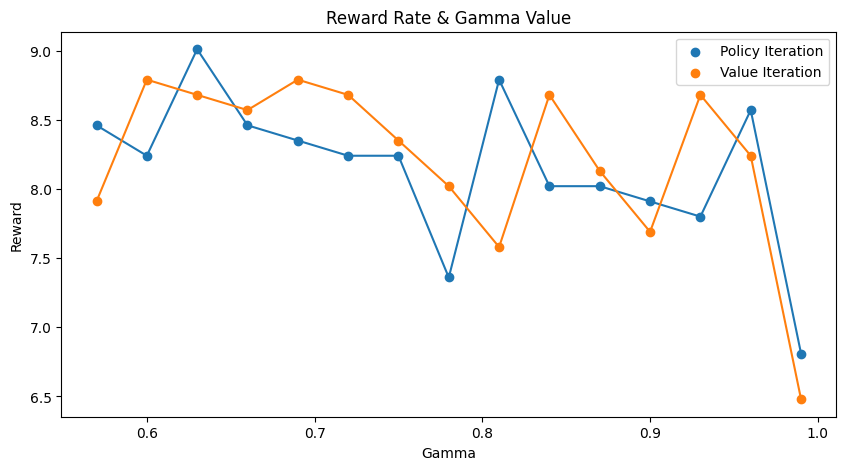

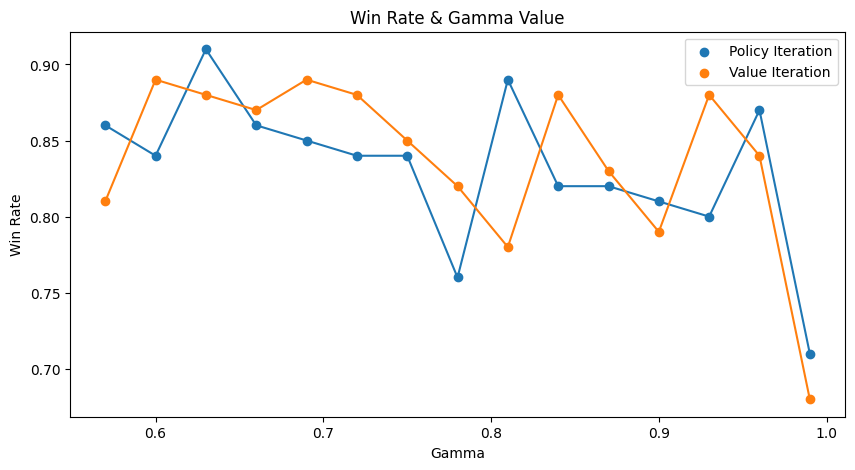

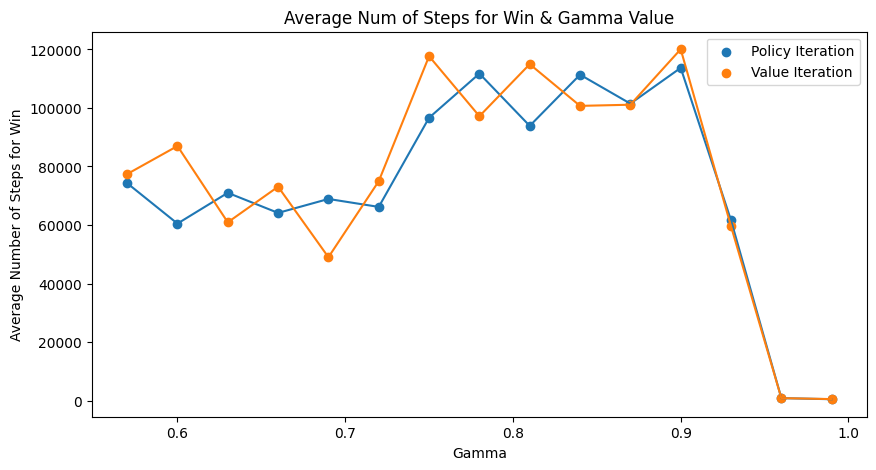

In [ ]:
#Plotting win rate, average score and number of steps
fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Reward Rate & Gamma Value')
plt.scatter(gammas,reward_rate_policy.mean(axis=1),label='Policy Iteration')
plt.scatter(gammas,reward_rate_value.mean(axis=1),label='Value Iteration')
plt.plot(gammas,reward_rate_policy.mean(axis=1))
plt.plot(gammas,reward_rate_value.mean(axis=1))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Reward')

fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Win Rate & Gamma Value')
plt.scatter(gammas,win_rate_policy.mean(axis=1),label='Policy Iteration')
plt.scatter(gammas,win_rate_value.mean(axis=1),label='Value Iteration')
plt.plot(gammas,win_rate_policy.mean(axis=1))
plt.plot(gammas,win_rate_value.mean(axis=1))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Win Rate')

fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Average Num of Steps for Win & Gamma Value')
plt.scatter(gammas,num_steps_won_policy.mean(axis=1),label='Policy Iteration')
plt.scatter(gammas,num_steps_won_value.mean(axis=1),label='Value Iteration')
plt.plot(gammas,num_steps_won_policy.mean(axis=1))
plt.plot(gammas,num_steps_won_value.mean(axis=1))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Average Number of Steps for Win')

In [547]:
def viz_policy(policy,env):
    # Visualize policy
    pygame.init()
    screen = pygame.display.set_mode((512, 512))
    clock = pygame.time.Clock()
    env.reset()
    # Main loop
    running = True
    i=0
    while running:
        # Handle events
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Perform a random action
        if i==0:
            state,_,ended,won,_=env.step(policy[0])
            i+=1
        else:
            state,_,ended,won,_=env.step(policy[state])

        # Render the environment
        if hasattr(env, 'render'):
            # Use the Gym's built-in rendering method
            env.render()
            img = env.render()
            img = np.transpose(img, (1, 0, 2))  # Transpose to match Pygame's display format
            pygame.surfarray.blit_array(screen, img)
            pygame.display.flip()
        
        if ended:
            time.sleep(0.5)
            running = False

        clock.tick(60)

    # Clean up
    pygame.quit()

In [ ]:
#Comparing magnitude of differences between value iteration and policy iteration
print(f'The normalized difference between both policies for all gammas and all runs is {np.linalg.norm(v_policy_iterations-v_value_iterations)} indicating convergence point was the same/similar')

The normalized difference between both policies for all gammas and all runs is 8.126419729041092e-08 indicating convergence point was the same/similar


In [ ]:
def visualize_policy(policies,env,gammas,title_header='None',row=3,cols=5):
    #env=[v.decode('ascii') for v in env]
    env=env.ravel()
    fig, axes = plt.subplots(row,cols)
    fig.set_size_inches(10*cols,5*row)
    plt.suptitle(f'{title_header} Policies Plotted',fontsize=18)
    arrow_colors = {
    0: 'blue',
    1: 'black',
    2: 'red',
    3: 'green'
    }

    grid_colors={
        b'H': 'red',
        b'G': 'green',
        b'F': 'grey',
        b'S': 'grey'
    }

    for i,ax in enumerate(axes.flatten()):
        policy=policies[i]
        ax.set_title('Gamma: {:.2f}'.format(gammas[i]))
        ax.set_xticks(np.arange(policy.shape[0]**(0.5)))
        ax.set_yticks(-1*np.arange(policy.shape[0]**(0.5)))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True)

        for ii in range(len(policy)):
            if policy[ii]==2:
                arrow = '→'
            elif policy[ii]==0:
                arrow = '←'
            elif policy[ii]==3:
                arrow = '↑'
            elif policy[ii]==1:
                arrow = '↓'
            else:
                continue
            x=int(ii%policy.shape[0]**(0.5))
            y=-int(ii/policy.shape[0]**(0.5))
            rect = plt.Rectangle((x, y), 1, 1, color=grid_colors[env[ii]], alpha=0.1)
            ax.add_patch(rect)
            ax.text(x,y,arrow, ha='center', va='center', color=arrow_colors[policy[ii]])
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_116136\154848103.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_policies[i]=stats.mode(big_array,axis=1)[0].ravel()


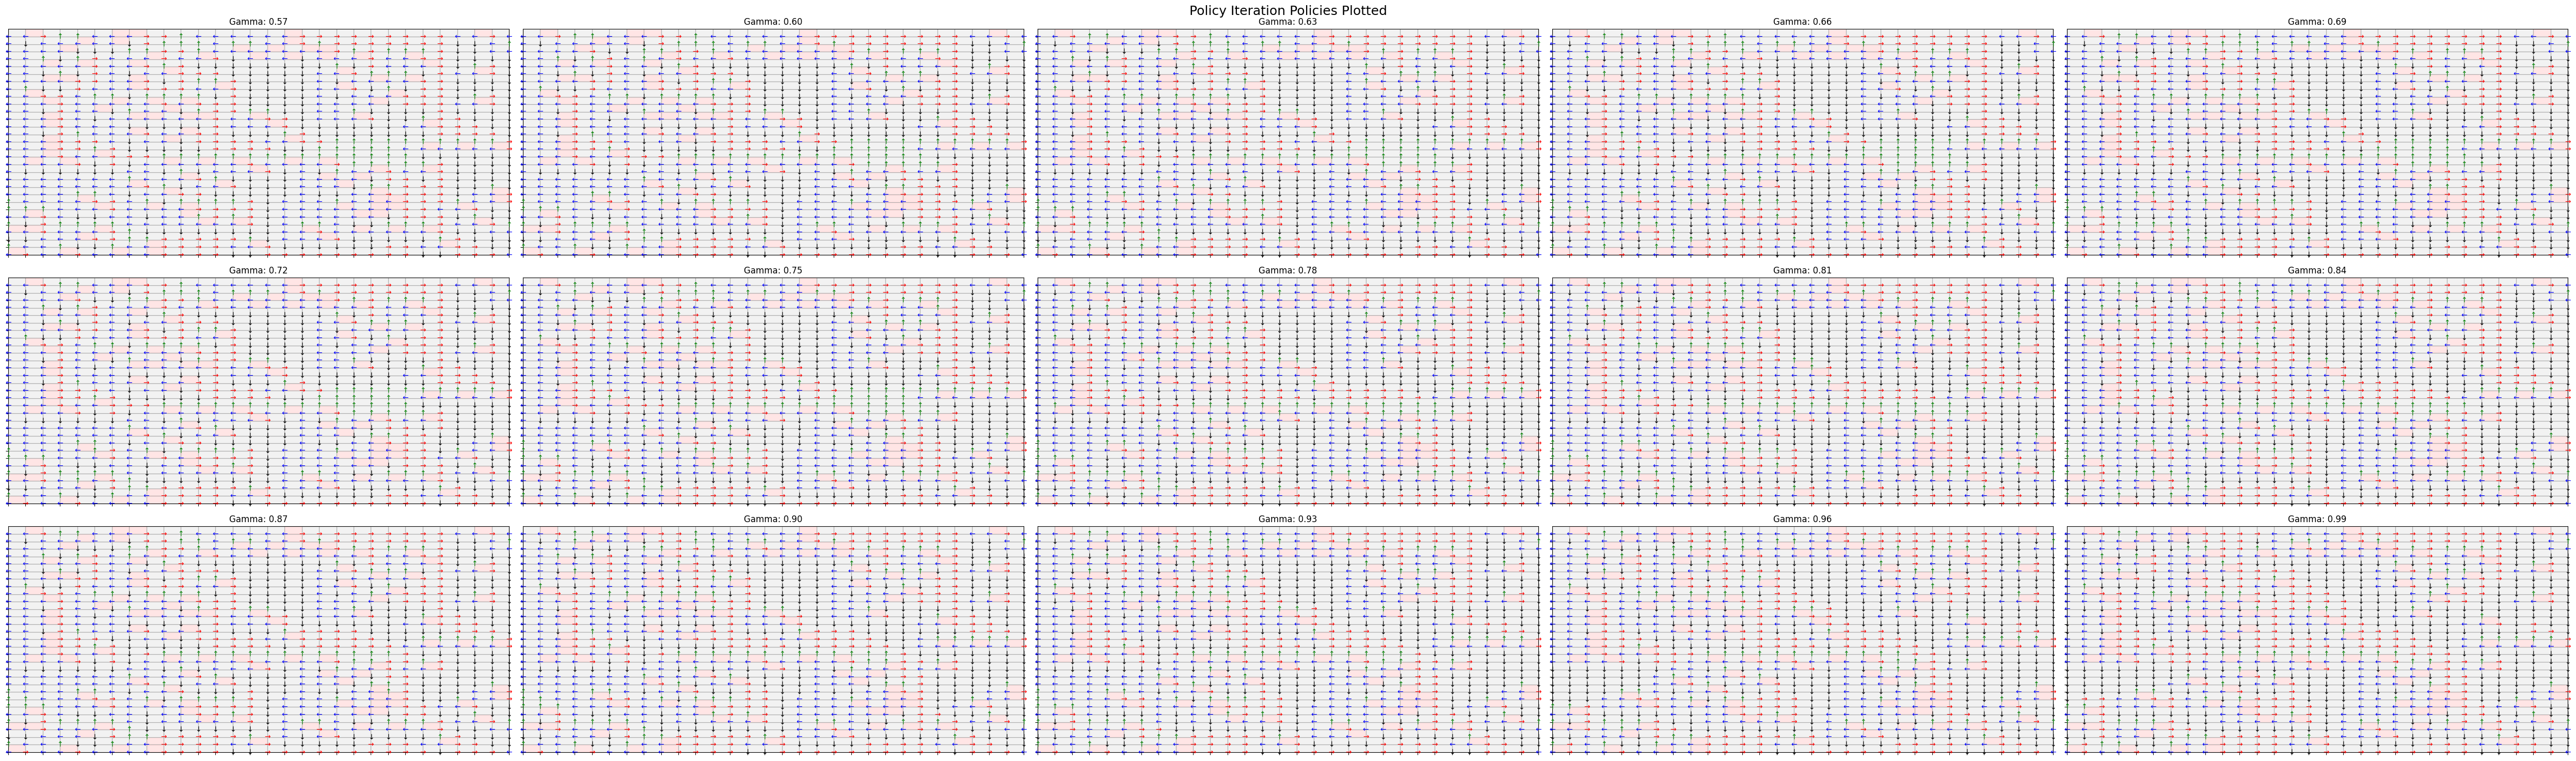

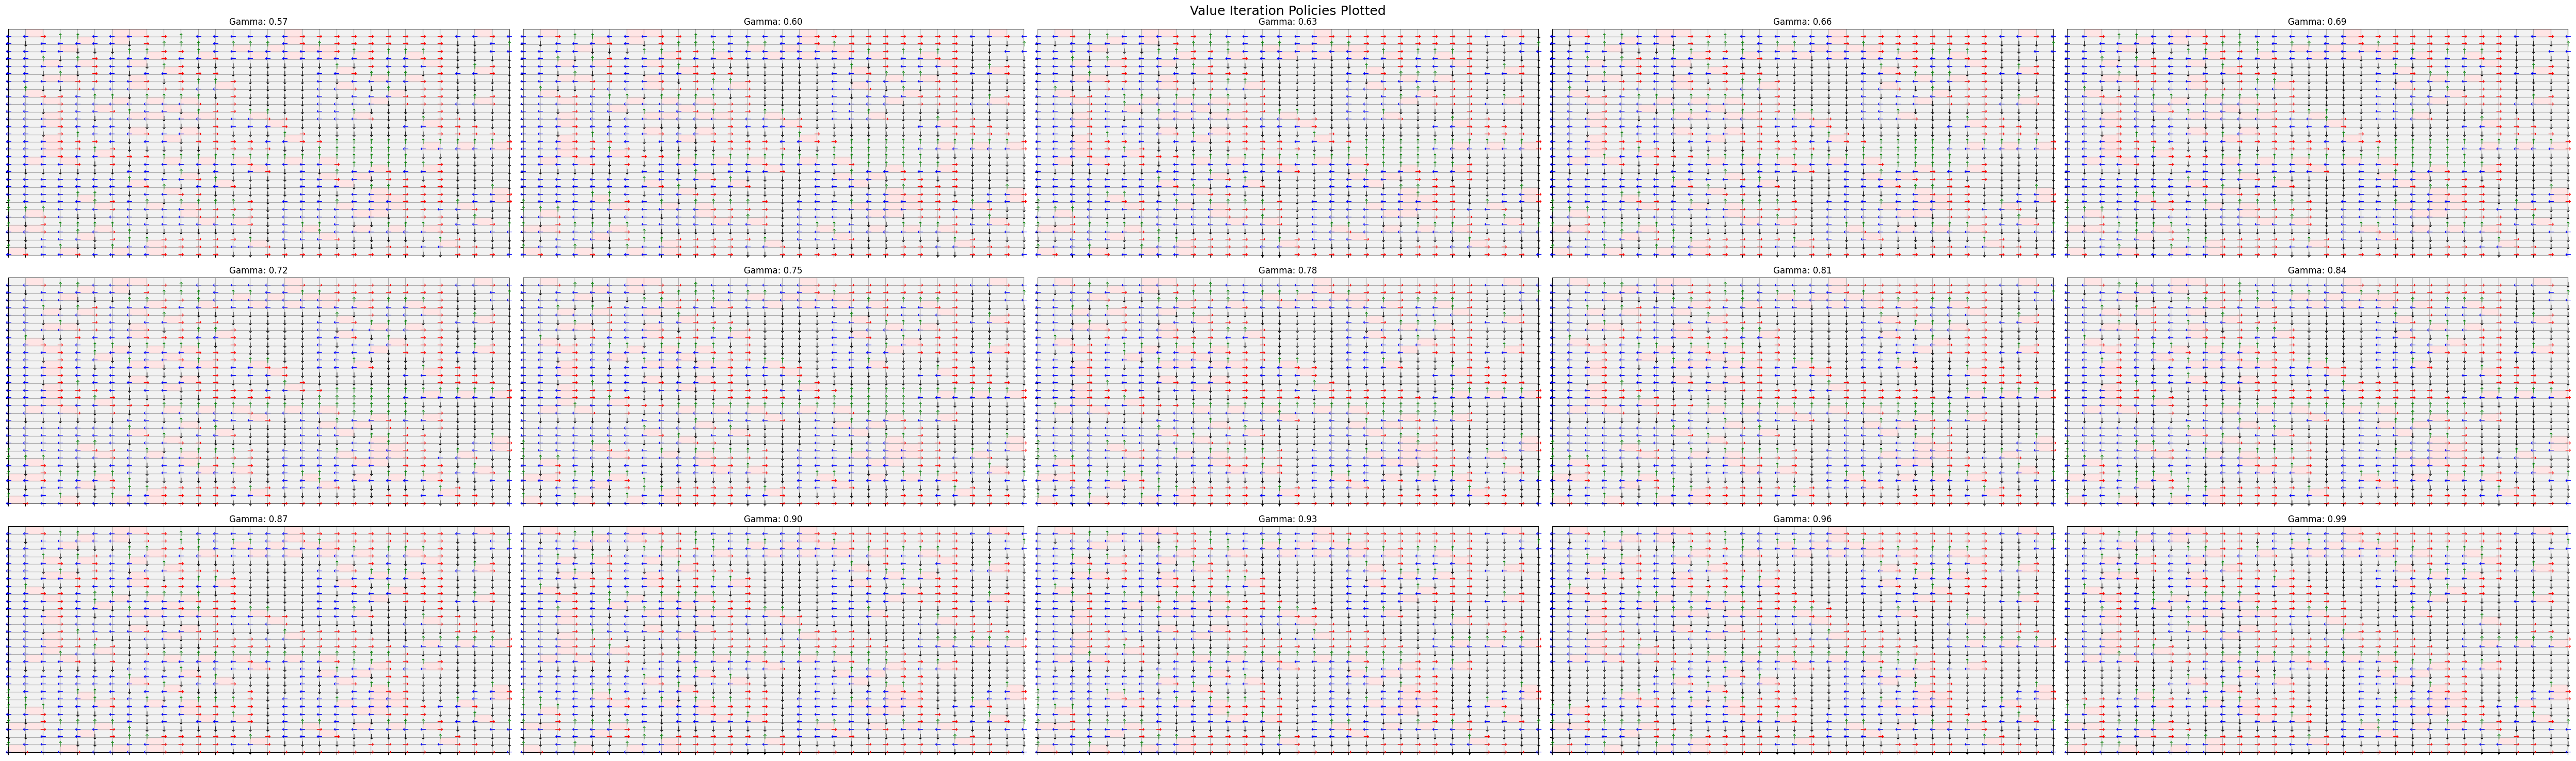

In [ ]:
#Visualizing policies for different gamms for Policy and Value Iteration
mod_policy_pi=mode_policy_dict(pi_policy_iteraetions,gammas)
mod_policy_val=mode_policy_dict(pi_value_iteraetions,gammas)

#Plotting
visualize_policy(mod_policy_pi,frozen_lake.desc,gammas,title_header='Policy Iteration')
visualize_policy(mod_policy_val,frozen_lake.desc,gammas,title_header='Value Iteration')

In [ ]:
def visualize_heatmap_states(values,gammas,title_header='None',row=3,cols=5):
    #env=[v.decode('ascii') for v in env]
    fig, axes = plt.subplots(row,cols)
    fig.set_size_inches(10*cols,5*row)
    plt.suptitle(f'{title_header} Policies Plotted',fontsize=18)

    for i,ax in enumerate(axes.flatten()):
        value=values[i,:]
        ax.set_title('Gamma: {:.2f}'.format(gammas[i]))
        ax.set_xticks(np.arange(values.shape[0]**(0.5)))
        ax.set_yticks(-1*np.arange(values.shape[0]**(0.5)))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        heatmap=ax.imshow(value.reshape(int(len(value)**(0.5)),int(len(value)**(0.5))), cmap='jet', interpolation='lanczos')
        plt.colorbar(heatmap, ax=ax)
    plt.tight_layout()
    plt.show()

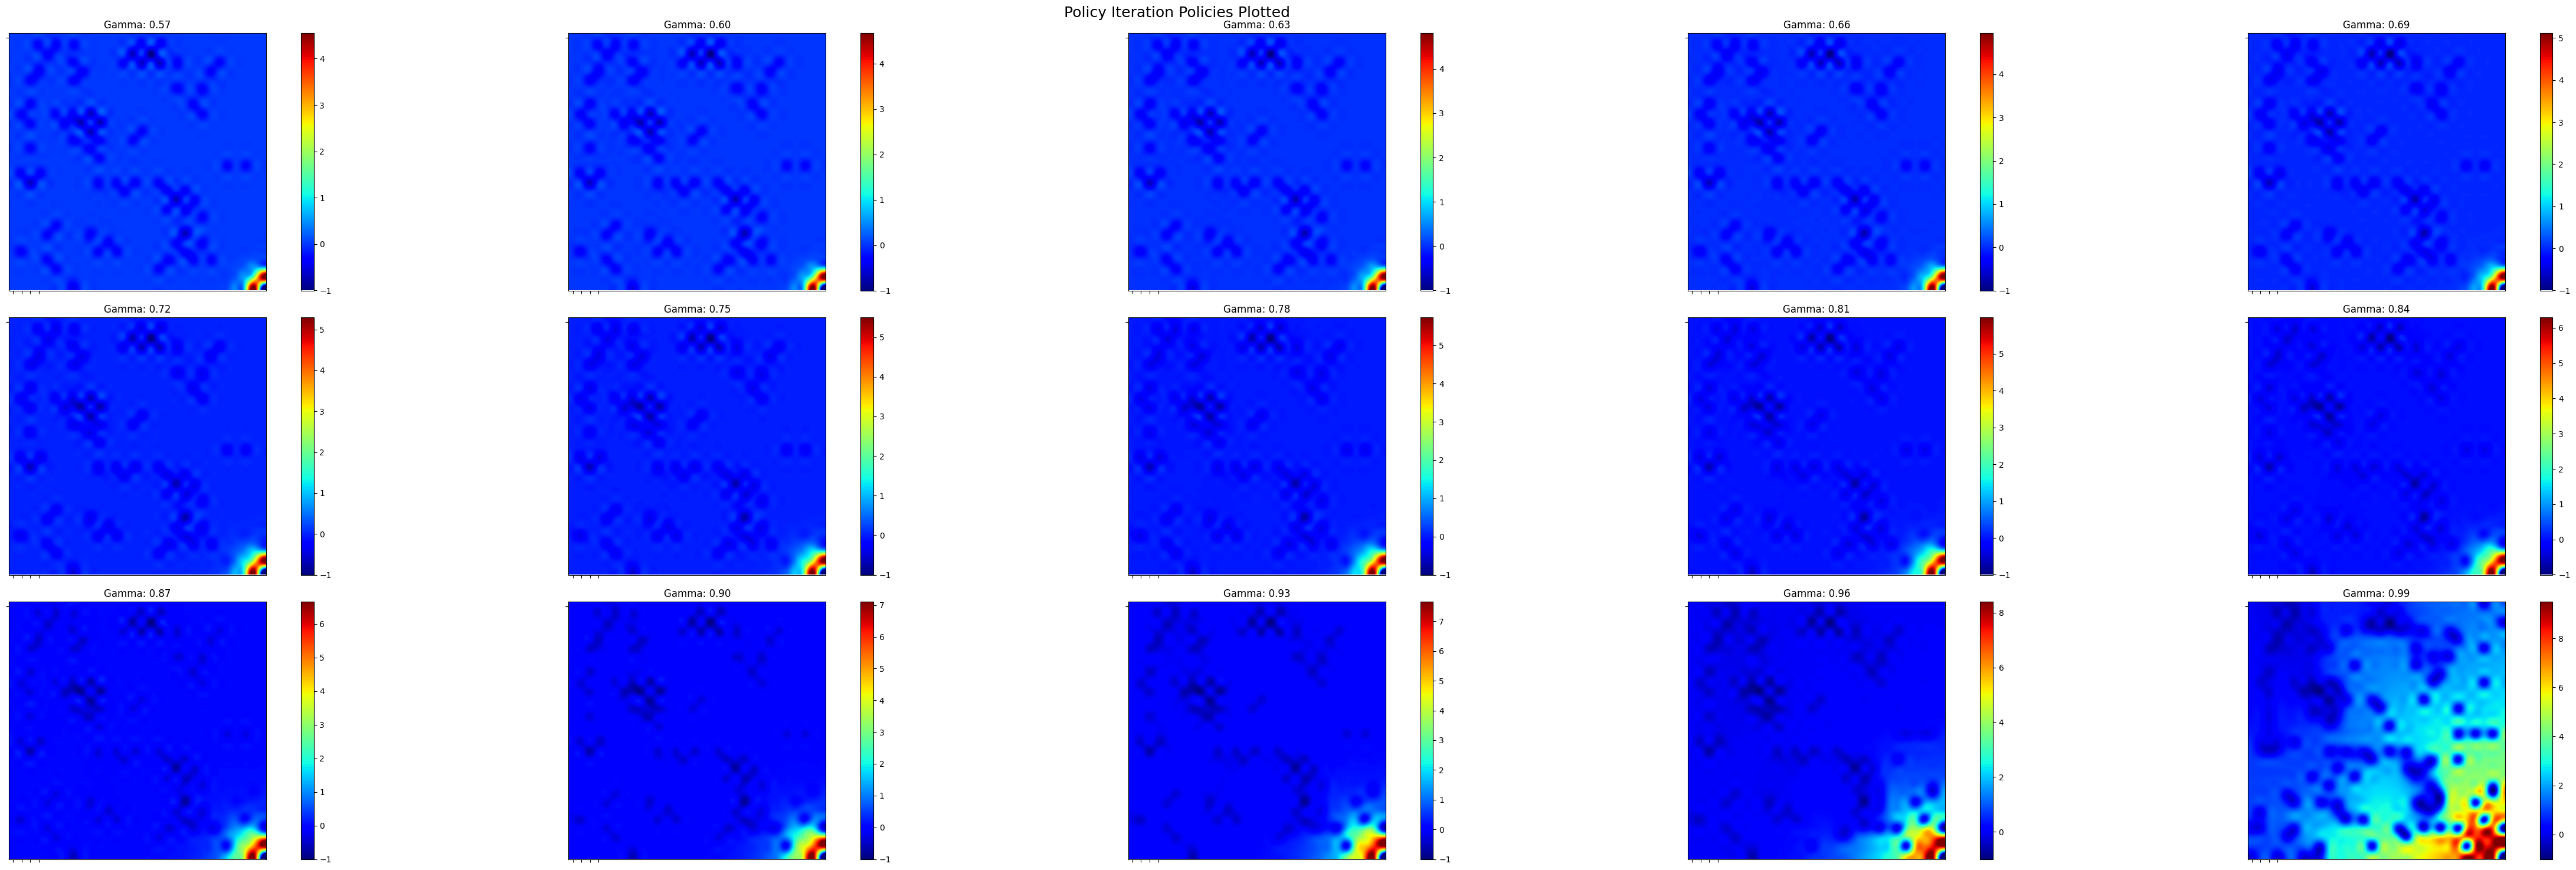

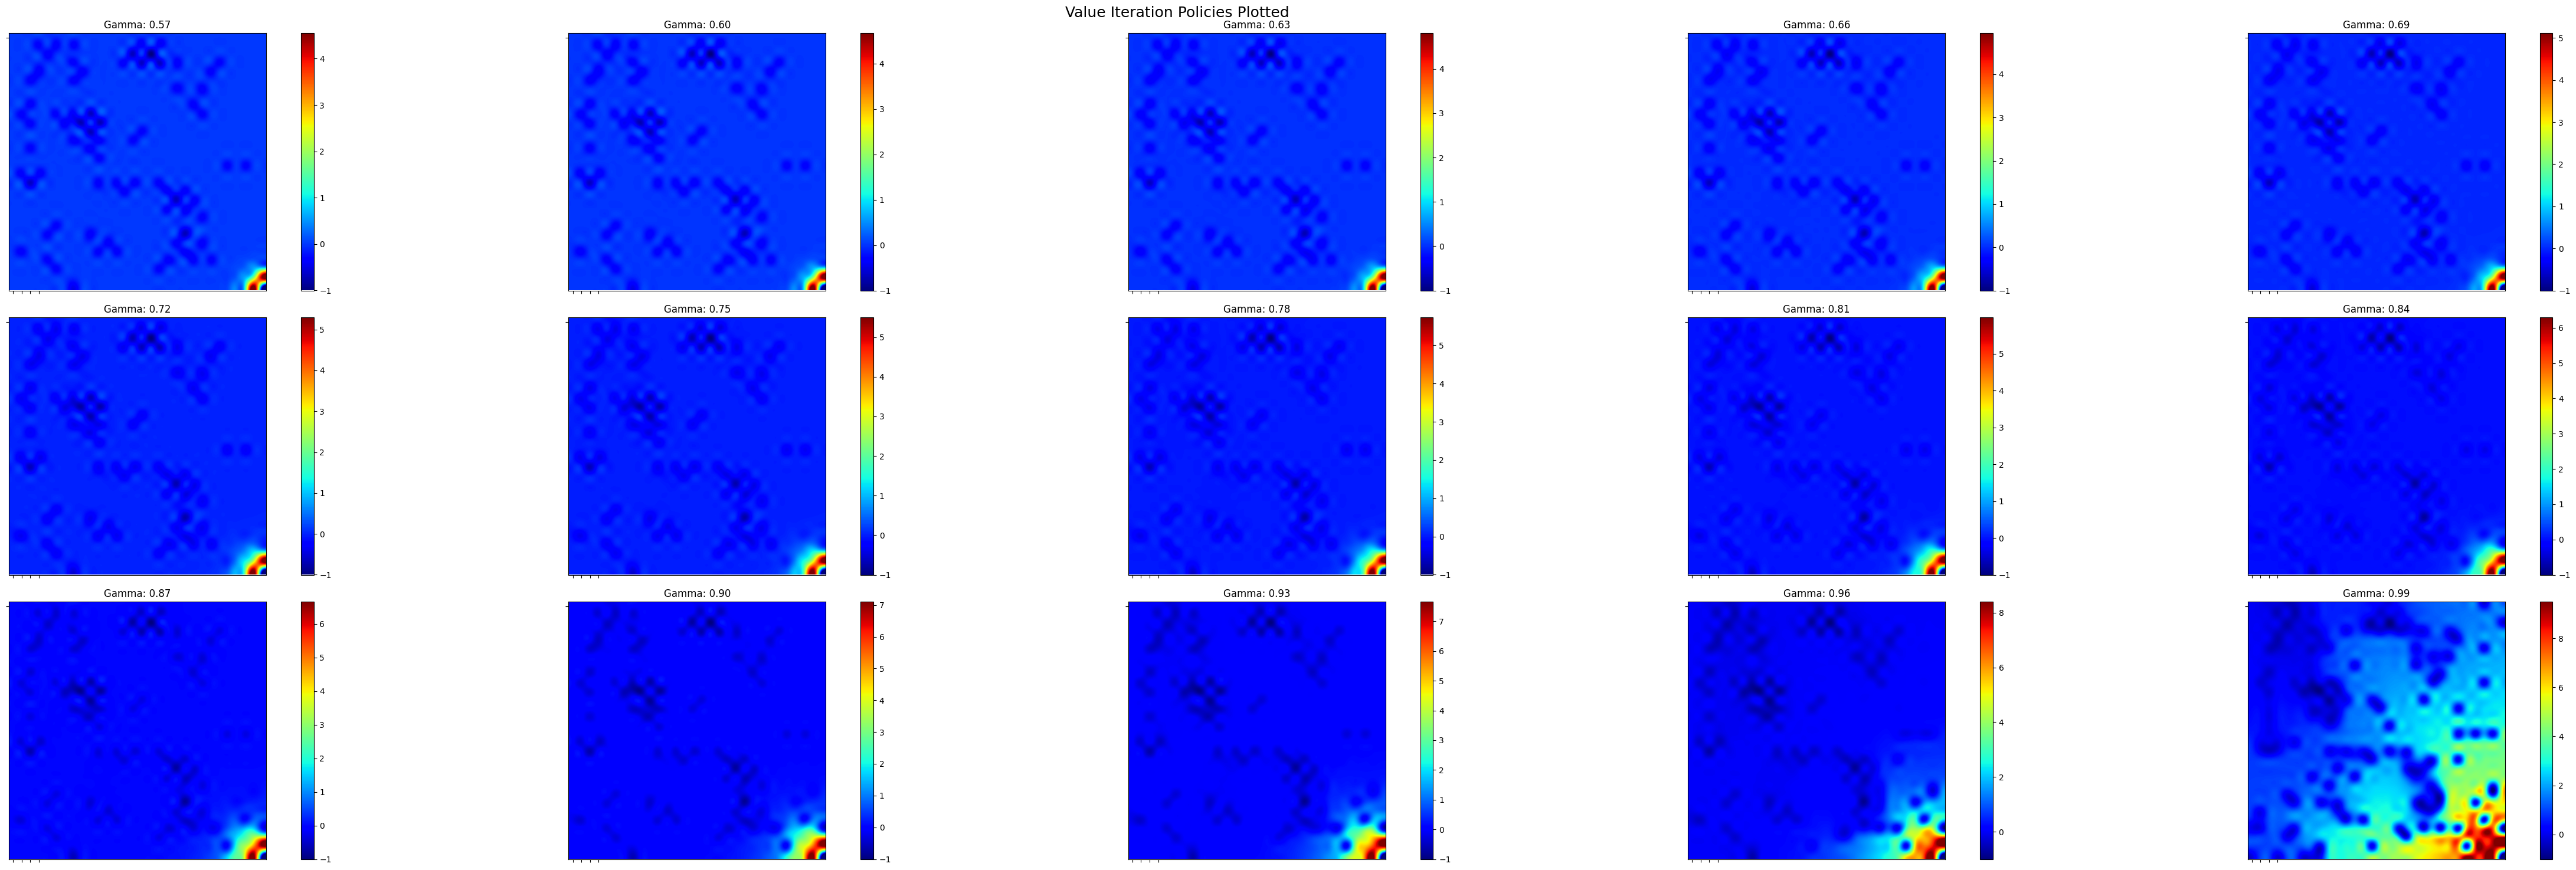

In [ ]:
visualize_heatmap_states(v_policy_iterations.mean(axis=1),gammas,'Policy Iteration')
visualize_heatmap_states(v_value_iterations.mean(axis=1),gammas,'Value Iteration')

## Q Learning

In [3]:
#Applying Q Learning grid search
gammas_grid=np.arange(0.72,1.00,0.09)
epsilon_decays=np.arange(0.59,1.0,0.09) 
iters=[int(1e6)]
env=frozen_lake
average_eval_rewards=[]
keys=[]

for i in itertools.product(gammas_grid, epsilon_decays, iters):
    print("running q_learning with gamma:", i[0],  "epsilon decay:", i[1],  " iterations:", i[2])
    Q, V, pi, Q_track, pi_track, total_reward = RL(env).q_learning(gamma=i[0], epsilon_decay_ratio=i[1], n_episodes=i[2])

    #summed_Q=Q_track.sum(axis=1).sum(axis=-1)
    #ind_cross=np.argwhere(summed_Q==0)[0][0]
    #Q_track[ind_cross:]=Q_track[np.argwhere(summed_Q==0)[0][0]-1]
    #total_reward[ind_cross:]=total_reward[np.argwhere(total_reward==0)[0][0]-1]

    episode_rewards = TestEnv.test_env(env=env, n_iters=100, pi=pi)

    #Plotting rewards and Q learning visualizations + Value heat map per run
    row=1
    cols=3
    fig, axes = plt.subplots(row,cols)
    fig.set_size_inches(10*cols,5*row)
    name='Gamma  {:.2f}, Episolon_Decay_Ratio {:.2f}'.format(i[0],i[1])
    plt.suptitle(name)
    
    mode_Q=np.max(Q_track,axis=-1)
    plot_Q=mode_Q.mean(axis=-1)
    axes[0].set_title('Mean V & Episodes')
    axes[0].plot(np.arange(plot_Q.shape[0]),plot_Q)
    axes[0].set_xlabel('Episodes')
    axes[0].set_ylabel('Mean V')


    cumulative_sum = np.cumsum(total_reward)
    windowed_sum = cumulative_sum[10 - 1:] - np.concatenate([[0], cumulative_sum[:-10]])
    windowed_sum=np.r_[-10*np.ones(cumulative_sum.shape[0]-windowed_sum.shape[0]),windowed_sum]
    axes[1].set_title('Reward & Episodes (10 Episodes Averaged)')
    axes[1].plot(np.arange(windowed_sum.shape[0]),windowed_sum)
    axes[1].set_xlabel('Episodes')
    axes[1].set_ylabel('Reward & Episodes')

    axes[2].set_title('Value Heatmap')
    axes[2].set_xticks(np.arange(V.shape[0]**(0.5)))
    axes[2].set_yticks(-1*np.arange(V.shape[0]**(0.5)))
    axes[2].set_xticklabels([])
    axes[2].set_yticklabels([])
    heatmap=axes[2].imshow(V.reshape(int(len(V)**(0.5)),int(len(V)**(0.5))), cmap='jet', interpolation='lanczos')
    plt.colorbar(heatmap, ax=axes[2])
    
    plt.tight_layout()
    plt.savefig('saved_plots/frozen_lake_gd/{}.png'.format(name))
    plt.close()
    print("Avg. episode reward: ", np.mean(episode_rewards))
    average_eval_rewards.append(np.mean(episode_rewards))
    keys.append(name)
    print("###################")


running q_learning with gamma: 0.72 epsilon decay: 0.59  iterations: 1000000


  0%|          | 0/1000000 [00:00<?, ?it/s]

C:\Users\Admin\Desktop\School\CS_7641\Assignment_4\gym_parent\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 1293.40 seconds
Avg. episode reward:  7.8
###################
running q_learning with gamma: 0.72 epsilon decay: 0.6799999999999999  iterations: 1000000


KeyboardInterrupt: 

In [ ]:
Q, V, pi, Q_track, pi_track = RL(frozen_lake).q_learning(gamma=0.999,epsilon_decay_ratio=0.99,n_episodes=1000000)
episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)

runtime = 1713.98 seconds


In [576]:
v_policy_iterations.mean(axis=-1).mean(axis=-1)

array([-0.0229694 , -0.02243189, -0.02174198, -0.02084881, -0.01967923,
       -0.01812467, -0.01601649, -0.0130815 , -0.0088522 , -0.00245713,
        0.00790366,  0.02664784,  0.06791191,  0.20357576,  1.65534019])

In [560]:
Q_track.shape

(1000000, 900, 4)

In [565]:
test_Q=np.max(Q_track,axis=-1)

In [578]:
test_Q.mean(axis=-1)

array([ 0.        ,  0.        ,  0.        , ..., -0.04346789,
       -0.04346789, -0.04346693])

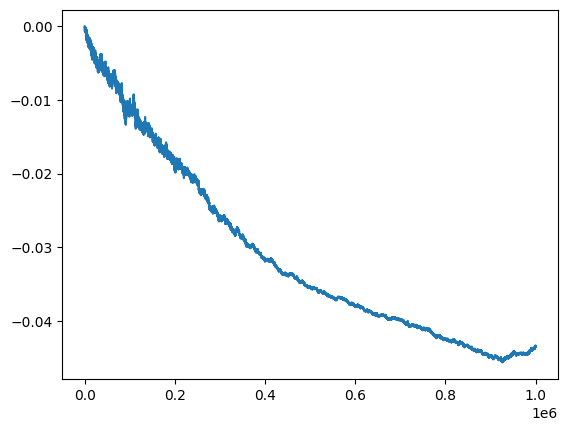

In [570]:
plt.plot(np.arange(test_Q.mean(axis=-1).shape[0]),test_Q.mean(axis=-1))

In [546]:
sum(episode_rewards>=10)/100

0.66

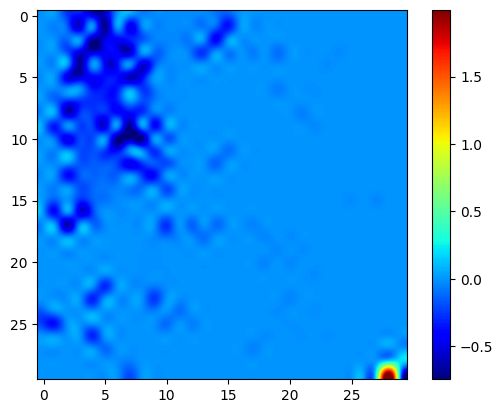

In [542]:
heatmap = plt.imshow(V.reshape(30,30), cmap='jet', interpolation='lanczos')
#plt.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
plt.colorbar(heatmap)
plt.show()

In [531]:
#Applying Q Learning grid search
frozen_lake_rl=RL(frozen_lake)
REPEATS=5

Q_iterations=np.zeros(shape=(gammas.shape[0],REPEATS,size_val**2,frozen_lake.action_space.n))
Q_track_iterations=np.zeros(shape=(gammas.shape[0],REPEATS,iters,size_val**2,frozen_lake.action_space.n))
V_Q_iterations=np.zeros(shape=(len(gammas),REPEATS,size_val**2))
pi_Q_iterations={}
pi_Q_track_iterations=np.zeros(shape=(len(gammas),REPEATS,iters,size_val**2))


for g in gamma:
    


SyntaxError: invalid syntax (2843209346.py, line 4)